#### 문자열 인덱싱

In [1]:
# 필요 라이브러리 정의
import pandas as pd

In [2]:
# 데이터 정의
alarm = pd.read_csv('./data/강원도_강원도소방본부_소방용수시설.csv', encoding = 'cp949')
df = pd.read_csv('./data/구조 종별 신고.재난 데이터.csv', encoding= 'utf-8')

# 데이터 화재관련 값만 추출
df = df[(df['ACDNT_CAUSE'] == '기타화재') | (df['ACDNT_CAUSE'] == '화약류') | (df['ACDNT_CAUSE'] == '방화')
        | (df['ACDNT_CAUSE'] == '폭발물') | (df['ACDNT_CAUSE'] == '화재확인')]

# 누락값 확인 및 누락값이 있는 열 삭제
df.isnull().sum()
df = df.dropna(axis = 1) 

## 소방용수시설의 EMD_NM 만들기

- 재난데이터와 합치기 위해 EMD_NM를 만들어야함

In [3]:
# 소재지지번주소를 이용하여 읍면동 columns을 만들어야험
alarm.head()
# 소재지지번주소의 7번째 이후의 데이터를 만들어서 저장
alarm['EMD_NM'] = alarm['소재지지번주소'].str[7:]
alarm.head(5)

alarm['EMD_NM'] = alarm['EMD_NM'].str.lstrip() # 앞 공백을 제거
alarm['EMD_NM'].str.split(" ").head() # 공백을 기준으로 분할
dong = alarm['EMD_NM'].str.split(" ", expand=True) # expand = True 데이터 프레임 형태로 저장
dong

# 동의 첫번째 열을 EMD_NM로 지정
alarm['EMD_NM'] = dong[0]
alarm.head()

alarm['EMD_NM'].unique() # 일부 동이 띄어쓰기가 안되있어서 나누어 지지않음
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace(pat=r'[^\w]', repl=r'', regex=True) # 특수문자 제거
alarm['EMD_NM'].unique() # 숫자를 정규표현식을 이용하려 했지만 중앙로 n가 등 특수한 경우가 존재하여 제거 X  하나하나 지워야겠음

array(['남산면', '남면', '신동면', '서면', '석사동', '동산면', '퇴계동', '동내면', '퇴계도', '운교동',
       '소양로3가', '낙원동', '소양로4가', '중앙로1가', '중앙로2가', '근화동', '죽림동', '조양동',
       '중앙로3가', '약사동', '소양로1가', '중앙로', '옥천동', '교동', '봉의동', '요선동', '소양로2가',
       '효자동', '신북읍', '신동', '사농동', '우두동', '사북면', '북산면', '온의동', '삼천동',
       '칠전동', '송암동', '후평동', '동면', '동면장학리', '횡성읍', '갑천면', '공근면', '서원면',
       '둔내면', '청일면', '우천면', '안흥면', '강림면', '노학동', '금호동', '중앙동', '청학동',
       '청호동', '설악동', '도문동', '대포동', '대포동957', '장사동', '영랑동', '동명동', '홍천읍',
       '화촌면', '두촌면', '북방면', '영귀미면', '서석면', '내면', '내촌면', '영월읍', '북면',
       '주천면', '한반도면', '중동면', '상동읍', '김삿갓면', '평창읍', '미탄면', '대화면', '방림면',
       '봉평면', '용평면', '진부면', '대관령면', '갈말읍', '김화읍', '근남면', '근북면', '철원읍',
       '동송읍', '화천읍', '상서면', '하남면', '화처읍', '간동면', '사내면', '양구읍', '국토정중앙면',
       '방산면', '해안면', '인제읍', '기린면', '서화면', '상남면', '간성읍', '죽왕면', '토성면',
       '죽왕면인정리', '거진읍', '현내면', '양양읍', '손양면', '강현면', '현남면', '현북면', '안현동',
       '저동', '강문동', '초당동', '운정동', '난곡동', '죽헌동93317', '죽헌동', '지변동', '

In [4]:
# 전처리시 문제가 있던행을 변경
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('죽헌동93317', '죽헌동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('교동18991', '교동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('금학동73', '금학동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('성남동1016', '성남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('성남동1114', '성남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('성남동11310', '성남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('발한동3099', '발한동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('이로동1021', '이로동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('이로동194', '이로동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('구미동4821', '구미동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동1567', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동15797', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동15881', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('태장동1293', '태장동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('대포동957', '대포동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('포남동109721', '포남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('발한동238', '발한동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('묵호진동2447', '목호진동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동15681', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('북평동128', '북평동')


In [5]:
# 필요없는 데이터 columns 제거
del alarm['시설유형코드']
del alarm['시설번호']
del alarm['시군구코드']
del alarm['데이터기준일자']

In [6]:
# alarm.to_csv('소방용수시설.csv', encoding='cp949')
# df.to_csv('화재발생위치.csv', encoding='cp949')

---

In [7]:
# 시군구읍으로 해야함 => 중복되는 게 있음

alarm['Full_NM'] = alarm['시군구명'] + ' ' + alarm['EMD_NM']

df['Full_NM'] = df['SIGUNGU_NM'] + ' ' + df['EMD_NM']

---

## 하나의 데이터로 만들기

In [8]:
# 개수를 데이터프레임으로 변환
water = pd.DataFrame(alarm['Full_NM'].value_counts())
fire = pd.DataFrame(df['Full_NM'].value_counts())

# 인덱스를 초기화
water = water.reset_index()
fire = fire.reset_index()

# columns 이름 변경
water.rename(columns={'Full_NM':'용수시설개수'}, inplace=True)
fire.rename(columns={'Full_NM':'화재발생횟수'}, inplace=True)

# 공통된 행 합치기(index 기준으로)
dat = pd.merge(water, fire, on = 'index') 

dat.rename(columns={'index':'Full_NM'}, inplace=True)

dat

,Full_NM,용수시설개수,화재발생횟수
0,홍천군 홍천읍,183,63
1,횡성군 횡성읍,141,62
2,영월군 영월읍,137,54
3,원주시 지정면,127,60
4,태백시 황지동,112,49
...,...,...,...
239,철원군 근북면,1,1
240,삼척시 노곡면,1,11
241,삼척시 하장면,1,9
242,삼척시 성북동,1,2


---

## 필요한 파생변수 생성

- EMD_NM 별 평균화재도착시간 (화재발생도착시간 - 화재발생출동시간)

    출동시	출동분

    DSP_HOUR	DSP_MIN

    현장도착시	현장도착분

    SPT_ARVL_HOUR	SPT_ARVL_MIN


In [9]:
# 위에서 결측값이 있는데 제거했더니 도착시간이 안나와서 새로 load
df = pd.read_csv('./data/구조 종별 신고.재난 데이터.csv', encoding= 'utf-8')

# 데이터 화재관련 값만 추출

df = df[(df['ACDNT_CAUSE'] == '기타화재') | (df['ACDNT_CAUSE'] == '화약류') | (df['ACDNT_CAUSE'] == '방화')
        | (df['ACDNT_CAUSE'] == '폭발물') | (df['ACDNT_CAUSE'] == '화재확인')]

df['Full_NM'] = df['SIGUNGU_NM'] + ' ' + df['EMD_NM']

# 시간*60 + 분으로 해서 하나의 데이터로 만들었음
s_time = (df['DSP_HOUR']*60) + (df['DSP_MIN'])
a_time = (df['SPT_ARVL_HOUR']*60) + (df['SPT_ARVL_MIN'])

# 도착시간에 결측치가 있어서 0분으로 처리
a_time = a_time.fillna(s_time)

# 걸린시간
time = a_time - s_time

time = pd.DataFrame(time)
df['time'] = time

In [10]:
# EMD_NM 별 화재도착시간 만들기
# 평균화재도착시간으로 하려했는데 23시출발 - 0시 도착이면 값이 이상해져서 중앙값으로 하였음.
time = pd.DataFrame(df.groupby(df['Full_NM'])['time'].median())
time = time.reset_index()
time

,Full_NM,time
0,강릉시 강동면,13.0
1,강릉시 강문동,5.0
2,강릉시 견소동,6.0
3,강릉시 교동,5.0
4,강릉시 구정면,8.0
...,...,...
248,횡성군 서원면,10.0
249,횡성군 안흥면,10.0
250,횡성군 우천면,9.0
251,횡성군 청일면,6.5


In [11]:
dat = pd.merge(dat, time, on='Full_NM')
dat

,Full_NM,용수시설개수,화재발생횟수,time
0,홍천군 홍천읍,183,63,5.0
1,횡성군 횡성읍,141,62,5.0
2,영월군 영월읍,137,54,5.0
3,원주시 지정면,127,60,10.0
4,태백시 황지동,112,49,4.0
...,...,...,...,...
239,철원군 근북면,1,1,17.0
240,삼척시 노곡면,1,11,9.0
241,삼척시 하장면,1,9,5.0
242,삼척시 성북동,1,2,6.0


---

#### 풍향, 풍속

In [12]:
# 풍속 (결측치가 너무많아서 일단 전에 행으로 대체)
df['TIME_UNIT_WS'] = df['TIME_UNIT_WS'].fillna(method='ffill')

# groupby를 이용하여 읍면동별 평균값
TIME_UNIT_WS = pd.DataFrame(df.groupby(df['Full_NM'])['TIME_UNIT_WS'].mean())
TIME_UNIT_WS = TIME_UNIT_WS.reset_index()
TIME_UNIT_WS

# 풍향 결측치를 이전행으로 대체(풍속과 같은이유)
df['TIME_UNIT_WD'] = df['TIME_UNIT_WD'].fillna(method='ffill')
TIME_UNIT_WD = pd.DataFrame(df.groupby(df['Full_NM'])['TIME_UNIT_WD'].mean())
TIME_UNIT_WD = TIME_UNIT_WD.reset_index()
TIME_UNIT_WD

dat = pd.merge(dat, TIME_UNIT_WS, on='Full_NM')
dat = pd.merge(dat, TIME_UNIT_WD, on='Full_NM')
dat

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161
2,영월군 영월읍,137,54,5.0,1.333333,143.518519
3,원주시 지정면,127,60,10.0,1.583333,177.333333
4,태백시 황지동,112,49,4.0,1.387755,115.714286
...,...,...,...,...,...,...
239,철원군 근북면,1,1,17.0,2.000000,200.000000
240,삼척시 노곡면,1,11,9.0,1.909091,190.909091
241,삼척시 하장면,1,9,5.0,1.222222,122.222222
242,삼척시 성북동,1,2,6.0,1.000000,70.000000


---

#### SPT_FRSTT_DIST(거리)

    - 화재발생위치로 부터의 거리

In [13]:
fire = pd.read_csv('./data/화재 종별 신고.재난 데이터.csv', encoding='utf-8')
fire.head()

fire['Full_NM'] = fire['SIGUNGU_NM'] + ' ' + fire['EMD_NM']

# 화재발생위치로부터의 거리
dist = pd.DataFrame(fire.groupby(fire['Full_NM'])['SPT_FRSTT_DIST'].mean())
dist = dist.reset_index()
dist
dat = pd.merge(dat, dist, on='Full_NM')
dat

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512
...,...,...,...,...,...,...,...
221,삼척시 마달동,1,2,8.0,0.000000,0.000000,2.000000
222,삼척시 갈천동,1,7,5.0,2.285714,72.857143,5.333333
223,삼척시 건지동,1,3,9.0,1.000000,230.000000,4.000000
224,삼척시 노곡면,1,11,9.0,1.909091,190.909091,22.250000


---

#### 배관깊이, 출수압력, 배관지름

In [14]:
alarm.head()

#배관깊이
depth = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['배관깊이'].mean())
depth = depth.reset_index()
depth

#출수압력
pressure = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['출수압력'].mean())
pressure = pressure.reset_index()
pressure

#배관지름
diameter = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['배관지름'].mean())
diameter = diameter.reset_index()
diameter

# 데이터간 합
dat = pd.merge(dat, depth, on='Full_NM')
dat = pd.merge(dat, pressure, on='Full_NM')
dat = pd.merge(dat, diameter, on='Full_NM')
dat

dat['EMD_NM'] = dat['Full_NM'].str[4:]
dat['SGG_NM'] = dat['Full_NM'].str[:3]

In [15]:
# dat.to_csv('tidy_data.csv', encoding='cp949')

---

#### 읍면동별 인구

In [16]:
people = pd.read_csv('./data/강원도_읍면동별_주민등록인구.csv', encoding='cp949')
people.head()

,시군,행정구역(동읍면)별,5세별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,춘천시,신북읍,계,7503,3763,3740
1,춘천시,동면,계,19415,9571,9844
2,춘천시,동산면,계,1451,781,670
3,춘천시,신동면,계,2604,1351,1253
4,춘천시,남면,계,1081,588,493


In [17]:
dat

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,EMD_NM,SGG_NM
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0,홍천읍,홍천군
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0,횡성읍,횡성군
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0,영월읍,영월군
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0,지정면,원주시
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0,황지동,태백시
...,...,...,...,...,...,...,...,...,...,...,...,...
221,삼척시 마달동,1,2,8.0,0.000000,0.000000,2.000000,1.500000,6.500000,100.0,마달동,삼척시
222,삼척시 갈천동,1,7,5.0,2.285714,72.857143,5.333333,1.500000,6.500000,75.0,갈천동,삼척시
223,삼척시 건지동,1,3,9.0,1.000000,230.000000,4.000000,1.500000,4.000000,100.0,건지동,삼척시
224,삼척시 노곡면,1,11,9.0,1.909091,190.909091,22.250000,1.500000,4.000000,100.0,노곡면,삼척시


In [18]:
del people['5세별']
del people['남자인구수 (명)']
del people['여자인구수 (명)']

In [19]:
people.rename(columns={'행정구역(동읍면)별':'EMD_NM'}, inplace=True)
people.rename(columns={'시군':'SGG_NM'}, inplace=True)

people['Full_NM'] = people['SGG_NM'] + ' ' + people['EMD_NM']
people.head()

,SGG_NM,EMD_NM,총인구수 (명),Full_NM
0,춘천시,신북읍,7503,춘천시 신북읍
1,춘천시,동면,19415,춘천시 동면
2,춘천시,동산면,1451,춘천시 동산면
3,춘천시,신동면,2604,춘천시 신동면
4,춘천시,남면,1081,춘천시 남면


In [20]:
del people['SGG_NM']
del people['EMD_NM']

In [21]:
dat = pd.merge(dat, people, on='Full_NM')
dat.head()

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,EMD_NM,SGG_NM,총인구수 (명)
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0,홍천읍,홍천군,33754
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0,횡성읍,횡성군,20976
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0,영월읍,영월군,20883
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0,지정면,원주시,29115
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0,황지동,태백시,5970


In [22]:
# 전처리된 데이터를 tidy_data로 저장
dat.to_csv('tidy_data.csv', encoding='cp949', index=False)

---

#### 데이터 스케일링

In [23]:
dat = pd.read_csv('tidy_data.csv', encoding='cp949')
dat.head()

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,EMD_NM,SGG_NM,총인구수 (명)
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0,홍천읍,홍천군,33754
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0,횡성읍,횡성군,20976
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0,영월읍,영월군,20883
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0,지정면,원주시,29115
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0,황지동,태백시,5970


In [24]:
#데이터 스케일링을 위해 수치형, 범주형 데이터 분리
cat_dat = dat[['Full_NM', 'EMD_NM', 'SGG_NM']]
cat_dat.head()

,Full_NM,EMD_NM,SGG_NM
0,홍천군 홍천읍,홍천읍,홍천군
1,횡성군 횡성읍,횡성읍,횡성군
2,영월군 영월읍,영월읍,영월군
3,원주시 지정면,지정면,원주시
4,태백시 황지동,황지동,태백시


In [25]:
#데이터 스케일링을 위해 수치형, 범주형 데이터 분리
num_dat = dat.drop(columns=['Full_NM', 'EMD_NM', 'SGG_NM'])
num_dat.head()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명)
0,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0,33754
1,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0,20976
2,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0,20883
3,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0,29115
4,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0,5970


In [26]:
# 두개의 열을 새로운 계산을 위하여 따로 처리
data_count = dat[['용수시설개수', '화재발생횟수']]
data_count.head()

,용수시설개수,화재발생횟수
0,183,63
1,141,62
2,137,54
3,127,60
4,112,49


---
여기서부터 다시 캡쳐

In [27]:
# 나눗셈을 하기위해 최소값-1 값을 추가
# 
data_count.loc[len(data_count)] = [0,0]

C:\Users\kki96\AppData\Local\Temp/ipykernel_20512/3106396414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_count.loc[len(data_count)] = [0,0]


In [28]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(num_dat)
df_norm = scaler.transform(num_dat)
df_norm = pd.DataFrame(df_norm, columns=num_dat.columns)
df_norm.head()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명)
0,1.000000,1.000000,0.142857,0.140351,0.394892,0.043193,0.138530,0.472174,1.0,0.695115
1,0.769231,0.983871,0.142857,0.407470,0.535015,0.049475,0.140482,0.619892,0.0,0.426308
2,0.747253,0.854839,0.142857,0.105263,0.347801,0.037481,0.126500,0.485158,1.0,0.424352
3,0.692308,0.951613,0.500000,0.184211,0.518315,0.301543,0.074621,0.713634,1.0,0.597526
4,0.609890,0.774194,0.071429,0.122449,0.207597,0.010787,0.082681,0.479700,0.0,0.110632


In [29]:
# 용수시설개수와 화재발생횟수의 정규화 마지막 행 제거
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_count)
df_count = scaler.transform(data_count)
df_count = pd.DataFrame(df_count, columns=data_count.columns)
df_count = df_count.drop(143, axis=0)
df_count

,용수시설개수,화재발생횟수
0,1.000000,1.000000
1,0.770492,0.984127
2,0.748634,0.857143
3,0.693989,0.952381
4,0.612022,0.777778
...,...,...
138,0.027322,0.301587
139,0.027322,0.285714
140,0.021858,0.222222
141,0.005464,0.174603


In [30]:
df_norm['용수시설개수'] = df_count['용수시설개수']
df_norm['화재발생횟수'] = df_count['화재발생횟수']

In [31]:
# # Standard Scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(num_dat)
# df_std = scaler.transform(num_dat)
# df_std = pd.DataFrame(df_std, columns=num_dat.columns)
# df_std.head()

In [32]:
# # dat.to_csv('tidy_data.csv', encoding='cp949')
# dat = pd.read_csv('tidy_data.csv', encoding='cp949')
# alarm
# x = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['위도'].mean())
# x = x.reset_index()

# y = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['경도'].mean())
# y = y.reset_index()

# dat = pd.merge(dat, x, on='Full_NM')
# dat = pd.merge(dat, y, on='Full_NM')

# # dat.to_csv('test.csv', encoding='cp949')

---

In [33]:
# 다중회귀를 쓰려했지만 생각해보니 의미없을거 같아서 폐기

# df_norm = pd.read_csv('r회귀.csv', encoding='cp949')
# import statsmodels.formula.api as sm
# model = sm.ols(formula='용수시설개수 ~ 화재발생횟수 + time + TIME_UNIT_WS + TIME_UNIT_WD + SPT_FRSTT_DIST + 배관깊이 + 출수압력	+ 배관지름 + 총인구수',
#                data = df_norm).fit()
# model.summary()

---

#### 점수화

In [34]:
# df = df_norm.copy()
# df['시간지수'] = df['time'] + df['SPT_FRSTT_DIST']
# df['all'] = df['화재대비용수시설'] / df['시간지수']
# tq = pd.DataFrame(df['all'])
# tq

# new_data = pd.concat([cat_dat, tq], axis=1)
# df = df_norm.copy()
# df_norm['시간지수'] = df['time'] + df['SPT_FRSTT_DIST']
# df['all'] = df['화재대비용수시설'] / df['시간지수']

In [35]:
df = df_norm.copy()

In [36]:
# 시간과 거리의 개념은 반대되는 개념이므로 -1 후에 음수로 변환
df['time'] = df['time'] - 1
df['SPT_FRSTT_DIST'] = df['SPT_FRSTT_DIST'] - 1
df['총인구수 (명)'] = df['총인구수 (명)'] - 1


df['time'] = -df['time']
df['SPT_FRSTT_DIST'] = -df['SPT_FRSTT_DIST']
df['총인구수 (명)'] = -df['총인구수 (명)']

In [37]:
df.describe()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명)
count,143.000000,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.215102,0.355977,6.743257e-01,0.270859,0.509030,0.771018,0.162064,0.389376,0.806404,0.859308
std,0.170640,0.222545,2.130029e-01,0.203772,0.188938,0.190974,0.109886,0.202940,0.364155,0.181084
min,0.005464,0.015873,1.110223e-16,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
25%,0.101093,0.190476,5.714286e-01,0.121953,0.395252,0.671869,0.120112,0.240961,0.922908,0.839932
50%,0.163934,0.301587,7.142857e-01,0.231579,0.506549,0.809352,0.140315,0.359706,1.000000,0.931462
75%,0.278689,0.507937,8.571429e-01,0.363597,0.614604,0.929350,0.178808,0.488918,1.000000,0.961871
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
import math

In [39]:
df['화재예방지수'] = (df['용수시설개수'] / df['화재발생횟수'])

df.describe()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명),화재예방지수
count,143.000000,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.215102,0.355977,6.743257e-01,0.270859,0.509030,0.771018,0.162064,0.389376,0.806404,0.859308,0.675261
std,0.170640,0.222545,2.130029e-01,0.203772,0.188938,0.190974,0.109886,0.202940,0.364155,0.181084,0.501058
min,0.005464,0.015873,1.110223e-16,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.031297
25%,0.101093,0.190476,5.714286e-01,0.121953,0.395252,0.671869,0.120112,0.240961,0.922908,0.839932,0.398770
50%,0.163934,0.301587,7.142857e-01,0.231579,0.506549,0.809352,0.140315,0.359706,1.000000,0.931462,0.602459
75%,0.278689,0.507937,8.571429e-01,0.363597,0.614604,0.929350,0.178808,0.488918,1.000000,0.961871,0.817623
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.819672


In [40]:
df['화재예방지수'] = (df['화재예방지수']) + (df['time']) + (df['SPT_FRSTT_DIST'])

df.describe()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명),화재예방지수
count,143.000000,143.000000,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.215102,0.355977,6.743257e-01,0.270859,0.509030,0.771018,0.162064,0.389376,0.806404,0.859308,2.120604
std,0.170640,0.222545,2.130029e-01,0.203772,0.188938,0.190974,0.109886,0.202940,0.364155,0.181084,0.598446
min,0.005464,0.015873,1.110223e-16,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.766888
25%,0.101093,0.190476,5.714286e-01,0.121953,0.395252,0.671869,0.120112,0.240961,0.922908,0.839932,1.740146
50%,0.163934,0.301587,7.142857e-01,0.231579,0.506549,0.809352,0.140315,0.359706,1.000000,0.931462,2.069218
75%,0.278689,0.507937,8.571429e-01,0.363597,0.614604,0.929350,0.178808,0.488918,1.000000,0.961871,2.519086
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.723078


In [41]:
df['용수시설지수'] = df['출수압력'] + df['배관지름']

In [42]:
final = df.copy()

In [43]:
final_num = final[['화재예방지수', '용수시설지수', '총인구수 (명)']]

In [44]:
final_all = pd.concat([cat_dat, final_num], axis=1)

In [45]:
final_num.head()

,화재예방지수,용수시설지수,총인구수 (명)
0,2.813950,1.472174,0.304885
1,2.590587,0.619892,0.573692
2,2.693068,1.485158,0.575648
3,1.927146,1.713634,0.402474
4,2.704669,0.479700,0.889368


In [46]:
final_all

,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명)
0,홍천군 홍천읍,홍천읍,홍천군,2.813950,1.472174,0.304885
1,횡성군 횡성읍,횡성읍,횡성군,2.590587,0.619892,0.573692
2,영월군 영월읍,영월읍,영월군,2.693068,1.485158,0.575648
3,원주시 지정면,지정면,원주시,1.927146,1.713634,0.402474
4,태백시 황지동,황지동,태백시,2.704669,0.479700,0.889368
...,...,...,...,...,...,...
138,강릉시 왕산면,왕산면,강릉시,0.795778,1.335415,0.981656
139,철원군 근남면,근남면,철원군,1.224926,1.172767,0.969644
140,홍천군 내촌면,내촌면,홍천군,1.189922,1.158339,0.964217
141,삼척시 노곡면,노곡면,삼척시,1.291631,1.309182,1.000000


In [47]:
final_num.to_csv('./data/final_num_data1.csv', encoding='cp949', index=False)
cat_dat.to_csv('./data/final_cat_data1.csv', encoding='cp949', index=False)

---

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

(<seaborn.axisgrid.FacetGrid at 0x11c3288f370>,
 <seaborn.axisgrid.FacetGrid at 0x11c4647d6d0>)

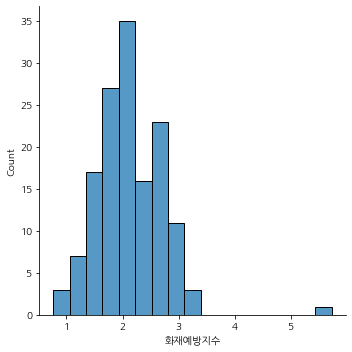

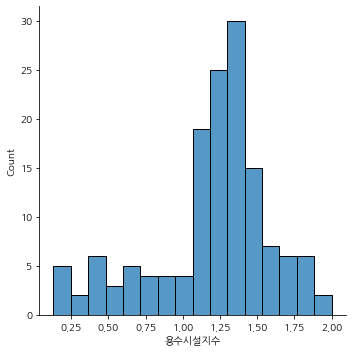

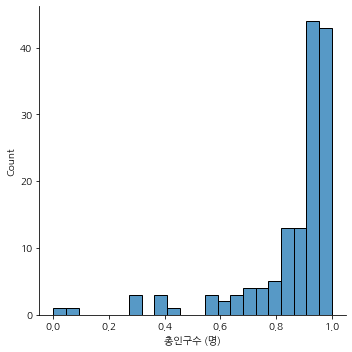

In [49]:
sns.displot(final_num['화재예방지수']), sns.displot(final_num['용수시설지수']), sns.displot(final_num['총인구수 (명)'])


In [50]:
final_num['Final Score'] = final_num['화재예방지수'] + final_num['용수시설지수'] + final_num['총인구수 (명)']
final_num

C:\Users\kki96\AppData\Local\Temp/ipykernel_20512/1892615390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_num['Final Score'] = final_num['화재예방지수'] + final_num['용수시설지수'] + final_num['총인구수 (명)']


,화재예방지수,용수시설지수,총인구수 (명),Final Score
0,2.813950,1.472174,0.304885,4.591009
1,2.590587,0.619892,0.573692,3.784170
2,2.693068,1.485158,0.575648,4.753873
3,1.927146,1.713634,0.402474,4.043253
4,2.704669,0.479700,0.889368,4.073738
...,...,...,...,...
138,0.795778,1.335415,0.981656,3.112850
139,1.224926,1.172767,0.969644,3.367337
140,1.189922,1.158339,0.964217,3.312477
141,1.291631,1.309182,1.000000,3.600812


In [51]:
final_data = pd.concat([cat_dat, final_num], axis = 1)

del final_data['화재예방지수']
del final_data['용수시설지수']
del final_data['총인구수 (명)']

In [52]:
final_data.sort_values(by='Final Score').head(5)

,Full_NM,EMD_NM,SGG_NM,Final Score
142,삼척시 하장면,하장면,삼척시,2.305948
40,횡성군 둔내면,둔내면,횡성군,2.741306
93,정선군 남면,남면,정선군,2.877478
65,영월군 주천면,주천면,영월군,2.917247
138,강릉시 왕산면,왕산면,강릉시,3.112850


In [60]:
# final_data.to_csv('Preprocessed_Data.csv', encoding='cp949')

---

In [54]:
df = pd.read_csv('./data/화재 종별 신고.재난 데이터.csv', encoding='utf-8')
df.head()

,MSFRTN_RESC_REPRT_NO,ACDNT_CAUSE,PRCS_RESULT_SE_NM,DCLR_YMD,DCLR_TM,DCLR_YR,SEASON_SE_NM,QTR_SE,DCLR_MNTH,DCLR_DAY,...,ACDNT_PLACE_NM,ACDNT_PLACE_DETAIL_NM,ACDNT_CAUSE_ASORT_NM,TIME_UNIT_TMPRT,TIME_UNIT_WS,TIME_UNIT_WD,TIME_UNIT_HUMIDITY,FRSTT_NM,WARD_NM,LFDAU_NM
0,20204201103M00003,작동기기,안전조치,20200101,15418,2020,겨울,1,1,1,...,공동주택,다세대주택,부주의,-8,360.0,2.0,51,춘천소방서,효자119안전센터,NaN
1,20204202104M00003,미상,안전조치,20200101,91144,2020,겨울,1,1,1,...,기타건축물,기타 건축물,미상,-6,45.0,2.0,75,원주소방서,단구119안전센터,NaN
2,20204203108M00007,"불꽃, 불티",안전조치,20200101,125616,2020,겨울,1,1,1,...,산불,사유림,부주의,6,225.0,18.0,34,강릉소방서,유천119안전센터,NaN
3,20204203103M00007,"마찰, 전도, 복사",안전조치,20200101,145024,2020,겨울,1,1,1,...,단독주택,단독주택,부주의,6,270.0,2.0,29,강릉소방서,주문진119안전센터,NaN
4,20204209107M00003,작동기기,안전조치,20200101,155021,2020,겨울,1,1,1,...,일반업무,기타 일반업무시설,전기적 요인,1,270.0,6.5,60,영월소방서,영월119안전센터,NaN


In [55]:
df['Full_NM'] = df['SIGUNGU_NM'] + ' ' + df['EMD_NM']

Full_NM	EMD_NM	SGG_NM	Final Score
142	삼척시 하장면	하장면	삼척시	2.305948
40	횡성군 둔내면	둔내면	횡성군	2.741306
93	정선군 남면	남면	정선군	2.877478
65	영월군 주천면	주천면	영월군	2.917247
138	강릉시 왕산면	왕산면	강릉시	3.112850

In [56]:
df_l = df[(df['Full_NM'] == '삼척시 하장면') | (df['Full_NM'] == '횡성군 둔내면') | (df['Full_NM'] == '정선군 남면')
        | (df['Full_NM'] == '영월군 주천면') | (df['Full_NM'] == '강릉시 왕산면')]

qgis = df_l[['Full_NM', 'SIGUNGU_NM', 'EMD_NM', 'LOC_INFO_X', 'LOC_INFO_Y']]
qgis.dropna(axis=0)
# qgis.to_csv('qgisdata.csv', encoding='cp949')

,Full_NM,SIGUNGU_NM,EMD_NM,LOC_INFO_X,LOC_INFO_Y
5,삼척시 하장면,삼척시,하장면,128.9242,37.3575
127,횡성군 둔내면,횡성군,둔내면,128.2436,37.5006
138,횡성군 둔내면,횡성군,둔내면,128.2086,37.5125
161,횡성군 둔내면,횡성군,둔내면,128.1865,37.4764
226,영월군 주천면,영월군,주천면,128.2699,37.2253
231,삼척시 하장면,삼척시,하장면,128.8698,37.3925
249,영월군 주천면,영월군,주천면,128.2286,37.2864
261,정선군 남면,정선군,남면,128.7133,37.3228
272,횡성군 둔내면,횡성군,둔내면,128.1867,37.4764
309,영월군 주천면,영월군,주천면,128.2419,37.2356


In [57]:
alarm1 = alarm[(alarm['Full_NM'] == '삼척시 하장면') | (alarm['Full_NM'] == '횡성군 둔내면') | (alarm['Full_NM'] == '정선군 남면')
        | (alarm['Full_NM'] == '영월군 주천면') | (alarm['Full_NM'] == '강릉시 왕산면')]

qgis = alarm1[['Full_NM', 'EMD_NM', '위도', '경도']]
qgis.dropna(axis=0)
# qgis.to_csv('qgisdata_alarm.csv', encoding='cp949')

,Full_NM,EMD_NM,위도,경도
1433,횡성군 둔내면,둔내면,37.519203,128.201199
1434,횡성군 둔내면,둔내면,37.512914,128.214327
1435,횡성군 둔내면,둔내면,37.514725,128.216582
1436,횡성군 둔내면,둔내면,37.513427,128.217923
1437,횡성군 둔내면,둔내면,37.512626,128.216204
...,...,...,...,...
5762,정선군 남면,남면,37.249294,128.773459
5763,정선군 남면,남면,37.244869,128.774903
5764,정선군 남면,남면,37.246993,128.777223
5765,정선군 남면,남면,37.267485,128.740778


In [58]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# distortions = []
# for i in range(1, 11):
#     km = KMeans(
#         n_clusters=i, init='random',
#         n_init=10, max_iter=300,
#         tol=1e-04, random_state=0
#     )
#     km.fit(final_num)
#     distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# # plot - 급격하게 줄어드는 부분
# plt.plot(range(1, 11), distortions, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Distortion')
# plt.show()
# from sklearn.cluster import KMeans

# model = KMeans(n_clusters = 3, random_state = 10)

# # 정규화된 데이터에 학습
# model.fit(final_num)

# # 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
# final_num['cluster'] = model.fit_predict(final_num)
# final_num
# cluster2 = pd.concat([cat_dat, final_num], axis=1)
# cluster2
# k = 3

# import matplotlib.pyplot as plt
# plt.rc('font', family='NanumGothic')

# plt.figure(figsize = (8, 8))

# for i in range(k):
#     plt.scatter(final_num.loc[final_num['cluster'] == i, '화재예방지수'], final_num.loc[final_num['cluster'] == i, '용수시설지수'], 
#                 label = 'cluster ' + str(i))

# plt.legend()
# plt.title('K = %d results'%k , size = 15)
# plt.xlabel('화재예방지수', size = 12)
# plt.ylabel('용수시설지수', size = 12)
# plt.show()
# k_means_labels = model.labels_ 
# print('k_means_labels : ', k_means_labels)
# k_means_cluster_centers = model.cluster_centers_ 
# print('k_means_cluster_centers : ', k_means_cluster_centers)


# import seaborn as sns
# plt.figure(figsize=(20, 6))
# plt.subplot(131)
# sns.scatterplot(x = final_num['화재예방지수'], y = final_num['용수시설지수'], data=final_num, hue=model.labels_,palette='coolwarm')
# plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', alpha=0.5, s=150)
# plt.title('K = 3 results' , size = 15)

# # https://frhyme.github.io/python-lib/matplotlib_3dplotting/
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d') 

# x = final_num['화재예방지수']
# y = final_num['용수시설지수']
# z = final_num['총인구수 (명)']
# ax.scatter(x, y, z, c = model.labels_, s= 20, alpha=0.5, cmap='rainbow')